# 자연처리 프레임워크 및 라이브러리 설치하기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# colab에 Mecab설치
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 91 (delta 43), reused 22 (delta 6), pack-reused 0
Unpacking objects: 100% (91/91), done.


In [ ]:
%cd Mecab-ko-for-Google-Colab

/content/Mecab-ko-for-Google-Colab


In [ ]:
!bash install_mecab-ko_on_colab190912.sh

Installing konlpy.....
     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 448 kB 56.4 MB/s 
     |████████████████████████████████| 86 kB 7.1 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2021-08-02 04:43:45--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22c3:9b0a, 2406:da00:ff00::34cc:ea4a, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?Signature=TnV4Vi0cClA2lysQ%2FuZDmVTAE40%3

In [ ]:
# 필요 프레임워크 및 라이브러리 준비
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Mecab
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/NLP_Classification/sentiment/Cleaned Dataset

# 데이터 로드

In [ ]:
# 사전에 정제+정규화된 훈련용 통합 데이터 로드
total_data = pd.read_table('clean_total_data(movie&shopping&game).txt')

In [ ]:
print(len(total_data))
print(total_data[:5])

489016
                                            document  label
0                                        이유식 냄비로 좋아요      1
1                                       한글화가 없어서짜징난다      0
2  에휴 존나 뚝 뚝 끊키는대뭘게임을하라고 무슨 핑은좋은대 게임만들어가면 뚝뚝 끊키고 ...      0
3                           이런 영화는 불륜남녀들만 보러가라거 만든거냐      0
4  아파트  가위 여자 단어로 찾았습니다국민학생 때 본 것 같은데 토요명화 딴따따따따 ...      1


# 토큰화

In [ ]:
# 불용어 파일 로드
import os
data =  open('sentiment_stopwords_v0.2.txt', 'r', encoding='utf-16')
stopwords = []
for line in data :
    line.rstrip()
    stopwords.append(line.replace("\t\n", ""))
print(len(stopwords))
print(stopwords)

772
['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라', '의해', '을', '를', '에', '의', '가', '으로', '로', '에게', '뿐이다', '의거하여', '근거하여', '입각하여', '기준으로', '예하면', '예를들면', '예를들자면', '저', '소인', '소생', '지말고', '하지마', '하지마라', '다른', '물론', '또한', '그리고', '비길수없다', '해서는안된다', '뿐만아니라', '만이아니다', '만은아니다', '막론하고', '관계없이', '그치지않다', '그러나', '그런데', '하지만', '든간에', '논하지않다', '따지지않다', '설사', '비록', '더라도', '아니면', '만못하다', '하는편이낫다', '불문하고', '향하여', '향해서', '향하다', '쪽으로', '틈타', '이용하여', '타다', '오르다', '제외하고', '이외에', '이밖에', '하여야', '비로소', '한다면몰라도', '외에도', '이곳', '여기', '부터', '기점으로', '따라서', '할생각이다', '하려고하다', '이리하여', '그리하여', '그렇게함으로써', '일때', '할때', '앞에서', '중에서', '보는데서', '으로써', '로써', '까지', '해야한다', '일것이다', '반드시', '할줄알다', '할수있다', '할수있어', '임에틀림없다', '한다면', '등', '등등', '제', '겨우', '단지', '다만', '할뿐', '딩동', '댕그', '대해서', '대하여', '대하면', '훨씬', '얼마나', '얼마만큼', '얼마큼', '남짓', '여', '얼마간', '약간', '다소', '좀', '조금', '다수', '몇', '얼마', '지만', '하물며', '그렇지만', '이외에도', '대해말하자면', '다음에', '반대로', '반대로말하자면', '이와반대로', '바꾸어서말하면', '바꾸어서한다면', '만약', '그렇지않으면', '까악', '툭', '딱', '삐걱

In [ ]:
# 훈련데이터에 형태소 분석기를 사용하여 토큰화를 하면서 불용어 제거
mecab = Mecab()
X_total = []
for sentence in total_data['document']:
    temp_X = mecab.morphs(sentence) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_total.append(temp_X)

In [ ]:
print(len(X_total))
print(X_total[:5])

489016
[['이유식', '냄비', '아요'], ['한글', '화', '어서', '짜', '징', '난다'], ['에휴', '존나', '뚝', '뚝', '끊', '키는', '대', '뭘', '핑', '대', '들어가', '끊', '키', '걸어다니', '괜찮', '은대', '총', '쏘', '끊', '키', '해결', '법', '뭘'], ['불', '륜', '남녀', '러', '만든'], ['아파트', '가위', '단어', '찾', '았', '국민학생', '본', '은데', '토요', '명화', '딴', '따따따따', '띠', '리리', '본', '아직', '기억', '남', '네요', '그냥', '충격', '었', '죠', '문득', '생각나', '제목', '드디어', '찾', '았', '네요', '근데']]


# 정수 인코딩

In [ ]:
# 기계가 텍스트를 숫자로 처리할 수 있도록 데이터를 정수로 변환
# 일단 단어 집합을 만들자
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_total)
 # fit_on_texts()안에 코퍼스를 입력으로 하면 빈도수를 기준으로 단어 집합을 생성한다.
 # 단어 빈도수가 높은순으로 낮은 정수 인덱스 부여

In [ ]:
# 등장 빈도수가 낮은 데이터를 처리해보자
# 특정 횟수 이하 단어의 비중이 몇인지 체크
threshold = 11
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 89524
등장 빈도가 10번 이하인 희귀 단어의 수: 70133
단어 집합에서 희귀 단어의 비율: 78.33988651087977
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.830388898606495


In [ ]:
# 전체 단어 개수 중 빈도수 12이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 19392


In [ ]:
# 단어집합을 케라스 토크나이저의 인자로 넘겨주면, 케라스 토크나이저는 텍스트 시퀀스를 숫자 시퀀스로 변환
#Tokenizer메서드에 숫자를 입력하면 빈도수가 높은 상위 몇개 단어만 사용
tokenizer = Tokenizer(num_words = vocab_size +2, oov_token ='OOV')
# 빈도수 상위 vocab_size단어만 사용, 숫자 0과 OOV를 고려해서 단어 집합의 크기는 +2
tokenizer.fit_on_texts(X_total)
# 여기까지는 보캡길이가 적용안된 것처럼 보임, 실제 적용은 text_to_sequences사용시 적용됨
X_total = tokenizer.texts_to_sequences(X_total)

# vocab_size로 지정한 단어만 보존하고 싶을 때, 굳이 안해도됨
# words_frequency = [w for w,c in tokenizer.word_index.items() if c >= vocab_size + 1] # 인덱스가 5 초과인 단어 제거
# for w in words_frequency:
#     del tokenizer.word_index[w] # 해당 단어에 대한 인덱스 정보를 삭제
#     del tokenizer.word_counts[w] # 해당 단어에 대한 카운트 정보를 삭제

# 정수인코딩 결과 확인
print(len(tokenizer.word_index))
print(tokenizer.word_index)
print(tokenizer.word_counts)

# 빈도수 상위 vocabsize개수의 단어는 2 ~ vocabsize+1까지의 인덱스를 가졌으며, 그 외 단어 집합에 없는 단어들은 전부 'OOV'의 인덱스인 1로 인코딩
# 케라스 토크나이저는 기본적으로 'OOV'의 인덱스를 1로 지정
# print('단어 OOV의 인덱스 : {}'.format(tokenizer.word_index['OOV']))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
y_total = np.array(total_data['label'])

# 빈 샘플(empty samples)제거

In [ ]:
# 각 샘플의 길이가 0인 샘플들의 인덱스 확인
drop_total = [index for index, sentence in enumerate(X_total) if len(sentence) < 1]
print(drop_total)

In [ ]:
# 빈 샘플들을 제거
X_total = np.delete(X_total, drop_total, axis=0)
y_total = np.delete(y_total, drop_total, axis=0)
print(len(X_total))
print(len(y_total))

# 패딩

리뷰의 최대 길이 : 82
리뷰의 평균 길이 : 9.118842737251951


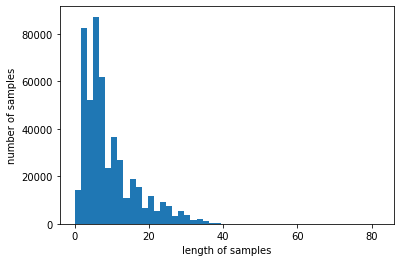

In [ ]:
# 서로 다른 길이의 샘플들의 길이를 동일하게 맞춰는 작업
# 전체 데이터에서 가장 길이가 긴 리뷰와, 전체의 길이분포를 알아보자
print('리뷰의 최대 길이 :',max(len(l) for l in X_total))
print('리뷰의 평균 길이 :',sum(map(len, X_total))/len(X_total))
plt.hist([len(s) for s in X_total], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
# 최적의 길이를 찾기 위해, 전체 샘플중 길이가 max_len 이하인 샘플의 비율을 확인하는 함수 생성
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [ ]:
# 비율 체크
max_len = 25
below_threshold_len(max_len, X_total)

전체 샘플 중 길이가 25 이하인 샘플의 비율: 95.65903774109641


In [ ]:
# 짧은 데이터는 0을 채우고, 기준을 넘는 데이터는 손실됨
X_total = pad_sequences(X_total, maxlen = max_len)

In [ ]:
print(len(X_total))
print(len(y_total))

489016
489016


#  모델 훈련

In [ ]:
# 필요한 프레임워크 및 라이브러리 임포트
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense, Input, Flatten, Concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [ ]:
embedding_dim = 128
dropout_prob = (0.5, 0.8)
num_filters = 128

In [ ]:
model_input = Input(shape = (max_len,))
z = Embedding(vocab_size+2, embedding_dim, input_length = max_len, name="embedding")(model_input)
z = Dropout(dropout_prob[0])(z)

In [ ]:
conv_blocks = []

for sz in [3, 4, 5]:
    conv = Conv1D(filters = num_filters,
                         kernel_size = sz,
                         padding = "valid",
                         activation = "relu",
                         strides = 1)(z)
    conv = GlobalMaxPooling1D()(conv)
    conv = Flatten()(conv)
    conv_blocks.append(conv)

In [ ]:
# 필요한 매트릭 선언, AUC-ROC, F1-Score, AUC-PR 에 필요한 지표 모두 체크
import tensorflow as tf

ROCauc = tf.keras.metrics.AUC(curve="ROC") # auc_1
PRauc = tf.keras.metrics.AUC(curve="PR") # auc_2
RECALL = tf.keras.metrics.Recall()
PRECISION = tf.keras.metrics.Precision()
TP = tf.keras.metrics.TruePositives()
TN = tf.keras.metrics.TrueNegatives()
FP = tf.keras.metrics.FalsePositives()
FN = tf.keras.metrics.FalseNegatives()

In [ ]:
z = Concatenate()(conv_blocks) if len(conv_blocks) > 1 else conv_blocks[0]
z = Dropout(dropout_prob[1])(z)
z = Dense(128, activation="relu")(z)
model_output = Dense(1, activation="sigmoid")(z)

model = Model(model_input, model_output)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['acc', ROCauc, PRauc, RECALL, PRECISION, TP, TN, FP, FN])

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('CNN_1D_KoNLPy(Mecab)_Total(movie+shopping+game)_v0.1.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.fit(X_total, y_total, epochs=10, callbacks=[es, mc], batch_size = 100, validation_split=0.2)

Epoch 1/10
3913/3913 [==============================] - 133s 34ms/step - loss: 0.4399 - acc: 0.7921 - auc_2: 0.8775 - auc_3: 0.8744 - recall_1: 0.7865 - precision_1: 0.7950 - true_positives_1: 153672.0000 - true_negatives_1: 156197.0000 - false_positives_1: 39620.0000 - false_negatives_1: 41723.0000 - val_loss: 0.4051 - val_acc: 0.8190 - val_auc_2: 0.9026 - val_auc_3: 0.9015 - val_recall_1: 0.7908 - val_precision_1: 0.8385 - val_true_positives_1: 38713.0000 - val_true_negatives_1: 41393.0000 - val_false_positives_1: 7456.0000 - val_false_negatives_1: 10242.0000

Epoch 00001: val_acc improved from -inf to 0.81905, saving model to CNN_1D_KoNLPy(Mecab)_Total(movie+shopping+game)_v0.1.h5
Epoch 2/10
3913/3913 [==============================] - 128s 33ms/step - loss: 0.3903 - acc: 0.8243 - auc_2: 0.9056 - auc_3: 0.9024 - recall_1: 0.8190 - precision_1: 0.8275 - true_positives_1: 160030.0000 - true_negatives_1: 162446.0000 - false_positives_1: 33371.0000 - false_negatives_1: 35365.0000 - val_

# 모델 성능평가(타겟데이터 기반)

In [ ]:
# 평가용 토탈 데이터셋2(화장품+앱)

# 데이터 로드
total_data2 = pd.read_table('clean_total_data(app&cosmetic).txt')

# 토크나이징
X_test_total2 = []
for sentence in total_data2['document']:
    temp_X2 = mecab.morphs(sentence)
    temp_X2 = [word for word in temp_X2 if not word in stopwords]
    X_test_total2.append(temp_X2)

# 워드 벡터화
tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(X_test_total2)
X_test_total2 = tokenizer.texts_to_sequences(X_test_total2)

# 패딩
X_test_total2 = pad_sequences(X_test_total2, maxlen = max_len)

# 라벨데이터 포함
y_test_total2 = np.array(total_data2['label'])

In [ ]:
# 모델 성능 평가 
loaded_model = load_model('CNN_1D_KoNLPy(Mecab)_Total(movie+shopping+game)_v0.1.h5')
result = loaded_model.evaluate(X_test_total2, y_test_total2, batch_size=100)
print("\n 테스트 결과:",result)

107/107 [==============================] - 1s 6ms/step - loss: 0.9405 - acc: 0.4942 - auc_2: 0.4564 - auc_3: 0.6756 - recall_1: 0.5201 - precision_1: 0.6833 - true_positives_1: 3878.0000 - true_negatives_1: 1374.0000 - false_positives_1: 1797.0000 - false_negatives_1: 3578.0000

 테스트 결과: [0.9404963254928589, 0.4942128658294678, 0.4564429223537445, 0.6755691170692444, 0.520117998123169, 0.6833480000495911, 3878.0, 1374.0, 1797.0, 3578.0]
